In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Define DIN font
plt.rcParams["font.family"] = "DIN Alternate"

### Operator distribution depending on scale

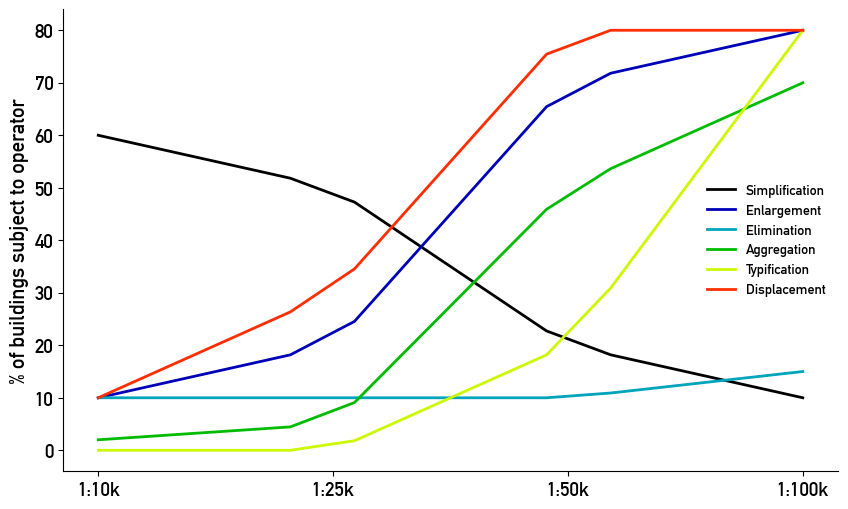

In [7]:
path = "../../Figures/Generalization/Distribution"

distribution = pd.read_csv(f"{path}/operator_distribution.csv")

# Define the scale categories
scales = ["1:10k", "1:25k", "1:50k", "1:100k"]
x_numeric = np.array([1, 2, 3, 4])  # Numeric x values corresponding to the scale categories

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.get_cmap('nipy_spectral')

# Number of operators
num_operators = len(distribution)

# Define a finer x-axis for smoother transitions
x_fine = np.linspace(x_numeric.min(), x_numeric.max(), num=12)  # Increase number for smoother lines

# Plot a smooth line for each operator
for index, row in distribution.iterrows():
    y_values = row[scales].astype(float).values
    
    # Linear interpolation
    lin_interp = np.interp(x_fine, x_numeric, y_values)
    
    ax.plot(x_fine, lin_interp, label=row['operator'], color=colors(index / num_operators), linewidth=2)

# Add labels and title
ax.set_ylabel('% of buildings subject to operator', fontsize=15)
ax.legend(frameon=False)
ax.set_xticks(x_numeric)
ax.set_xticklabels(scales)

ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

# Show the plot
plt.show()

# save plot
fig.savefig(f"{path}/operator_distribution.png")

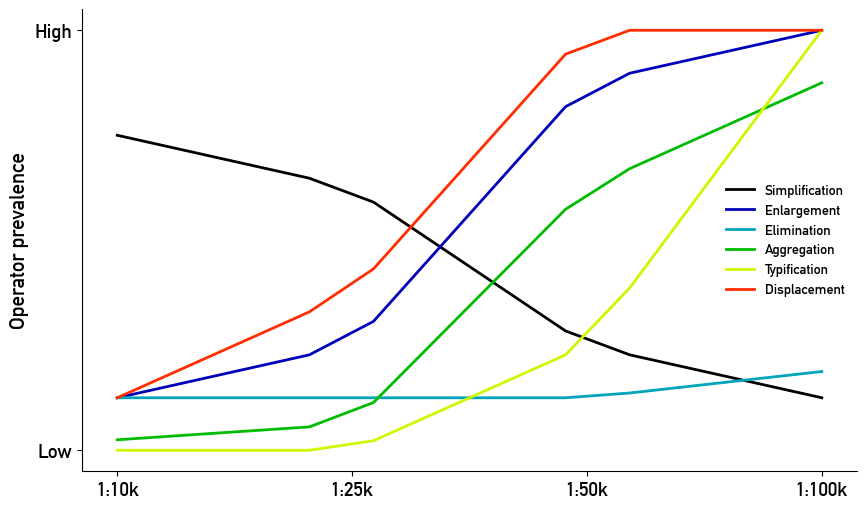

In [6]:
# Assuming you have already loaded the 'distribution' DataFrame
path = "../../Figures/Generalization/Distribution"
distribution = pd.read_csv(f"{path}/operator_distribution.csv")

# Define the scale categories
scales = ["1:10k", "1:25k", "1:50k", "1:100k"]
x_numeric = np.array([1, 2, 3, 4])  # Numeric x values corresponding to the scale categories

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.get_cmap('nipy_spectral')

# Number of operators
num_operators = len(distribution)

# Define a finer x-axis for smoother transitions
x_fine = np.linspace(x_numeric.min(), x_numeric.max(), num=12)  # Increase number for smoother lines

# Find maximum y-value across all operators
max_y_value = 0

# Plot a smooth line for each operator
for index, row in distribution.iterrows():
    y_values = row[scales].astype(float).values
    
    # Check and update the maximum y-value found
    if max(y_values) > max_y_value:
        max_y_value = max(y_values)
    
    # Linear interpolation
    lin_interp = np.interp(x_fine, x_numeric, y_values)
    
    ax.plot(x_fine, lin_interp, label=row['operator'], color=colors(index / num_operators), linewidth=2)

# Customize the y-axis to have qualitative labels
ax.set_yticks([0, max_y_value])  # 'Low' at zero, 'High' at the maximum value
ax.set_yticklabels(['Low', 'High'])

# Add labels and title
ax.set_ylabel('Operator prevalence', fontsize=15)
ax.legend(frameon=False)
ax.set_xticks(x_numeric)
ax.set_xticklabels(scales)

ax.tick_params(axis='both', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

# Save plot
fig.savefig(f"{path}/operator_distribution.png")